## Airline Ticket Dataset — Data Cleaning & Preparation

### How does market concentration and airline competition affect ticket prices across routes over time?
### 1. Load Data

We load the airline ticket dataset and create a working copy `air` to perform cleaning and feature engineering without modifying the original dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt## Airline Ticket Dataset — Data Cleaning & Preparation
!pip install xgboost
!pip install shap


  Using cached xgboost-3.2.0-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.29.3-py3-none-manylinux_2_18_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.2.0-py3-none-manylinux_2_28_x86_64.whl (131.7 MB)
Using cached nvidia_nccl_cu12-2.29.3-py3-none-manylinux_2_18_x86_64.whl (289.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
  Using cached shap-0.50.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.50.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (1.1 MB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [shap]1/2 [shap]


In [2]:
airline = pd.read_excel("airline_ticket_dataset.xlsx")
air = airline.copy()

### 2. Inspect the Raw Dataset

We first examine the first few rows to understand the structure and what each observation looks like.
The dataset contains route-level observations across different **years** and **quarters**, with information on:

* route characteristics (city1, city2, distance)
* demand (passengers)
* ticket prices (fare, fare_lg, fare_low)
* market structure (large_ms, lf_ms)
* city-level aggregated metrics (e.g., TotalFaredPax_city1/city2)

In [3]:
air.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,fare_lg,carrier_low,lf_ms,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2
0,2025,2,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1118,17955,208.52,B6,...,191.48,B6,0.2551,191.48,4.322090e+06,0.88590,-0.065800,2.978413e+06,0.821150,-0.032867
1,2025,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,17310,157.68,WN,...,169.03,AS,0.1193,140.59,2.822942e+06,0.86508,-0.038060,3.284783e+06,0.880833,-0.051467
2,2025,2,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,13648,430.38,DL,...,526.21,B6,0.2272,365.63,2.822942e+06,0.86508,-0.038060,2.978413e+06,0.821150,-0.032867
3,2025,2,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,12627,186.50,B6,...,186.10,B6,0.3735,186.10,2.978413e+06,0.82115,-0.032867,8.664260e+06,0.979700,-0.115500
4,2025,2,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,11284,221.33,UA,...,238.62,AA,0.2426,217.36,5.402975e+06,0.77515,-0.007850,2.978413e+06,0.821150,-0.032867


### 3. Remove Identifier Columns

The columns `citymarketid_1` and `citymarketid_2` are route identifiers.
They are not meaningful predictors for our analysis and may introduce noise, so we remove them before modeling.

In [4]:

air = air.drop(columns=[
    'citymarketid_1',
    'citymarketid_2'
])
# remove the type 'id'

In [5]:
airline.shape

(14004, 21)




### 4. Missing Value Handling

We check missing values across the dataset.
A small number of rows contain missing values in the city-level aggregate variables (e.g., TotalFaredPax_city1/city2 and related measures).

Since the missingness is minimal relative to the dataset size, we drop rows with missing values to ensure the modeling dataset is complete and consistent.



In [6]:
# null value?
airline.isna().sum()

Year                     0
quarter                  0
citymarketid_1           0
citymarketid_2           0
city1                    0
city2                    0
nsmiles                  0
passengers               0
fare                     0
carrier_lg               0
large_ms                 0
fare_lg                  0
carrier_low              0
lf_ms                    0
fare_low                 0
TotalFaredPax_city1      7
TotalPerLFMkts_city1     7
TotalPerPrem_city1       7
TotalFaredPax_city2     25
TotalPerLFMkts_city2    25
TotalPerPrem_city2      25
dtype: int64

In [7]:
air = air.dropna()

In [8]:
air.isna().sum()
# null value removed.

Year                    0
quarter                 0
city1                   0
city2                   0
nsmiles                 0
passengers              0
fare                    0
carrier_lg              0
large_ms                0
fare_lg                 0
carrier_low             0
lf_ms                   0
fare_low                0
TotalFaredPax_city1     0
TotalPerLFMkts_city1    0
TotalPerPrem_city1      0
TotalFaredPax_city2     0
TotalPerLFMkts_city2    0
TotalPerPrem_city2      0
dtype: int64

In [9]:
# Step 5. Share sanity checks (fix share distortions)


# 1) shares must be in [0, 1]
share_cols = ["large_ms", "lf_ms"]
for c in share_cols:
    air = air[(air[c].notna()) & (air[c] >= 0) & (air[c] <= 1)]

# 2) large_ms + lf_ms should not exceed 1 (allow tiny numerical tolerance)
tol = 1e-6
air = air[(air["large_ms"] + air["lf_ms"]) <= (1 + tol)]

# 3) compute other share + HHI properly (keep it consistent everywhere)
air["other_share"] = 1 - air["large_ms"] - air["lf_ms"]
air["other_share"] = air["other_share"].clip(lower=0)

air["HHI"] = air["large_ms"]**2 + air["lf_ms"]**2 + air["other_share"]**2



### 6. Create a Time Index (Year + Quarter)

The dataset is quarterly. To represent time as a single numerical variable with **equal spacing** between quarters, we construct:

`time_index = Year * 4 + quarter`

This creates a continuous quarter-by-quarter index (each +1 represents one quarter), which can be used to control for general time trends in airfare and demand.

---

In [10]:
air['time_index'] = air['Year']*4 + air['quarter']
# combine the year and quarter together to show them numerically (as the data differents from years and quarters.)
# use quarter to be the unit 
air['time_index']

0        8102
1        8102
2        8102
3        8102
4        8102
         ... 
13997    8089
13998    8089
13999    8089
14000    8089
14003    8089
Name: time_index, Length: 11207, dtype: int64

In [24]:

# Step 6.5 Check duplicate routes

c1 = air["city1"].astype(str)
c2 = air["city2"].astype(str)

air["route_id"] = np.where(
    c1 < c2,
    c1 + "___" + c2,
    c2 + "___" + c1
)

dup_count = air.duplicated(
    subset=["Year", "quarter", "route_id"]
).sum()

print("Duplicate rows:", dup_count)

Duplicate rows: 0




### 7. Encode Categorical Variables (Dummy Variables)

The variables `carrier_lg` and `carrier_low` are categorical airline carrier codes.
Regression models require numerical inputs, so we convert these categories into **dummy (indicator) variables** via one-hot encoding.

Each carrier is represented by a binary variable:

* 1 if the observation corresponds to that carrier
* 0 otherwise

We use `drop_first=True` to avoid perfect multicollinearity (the dummy variable trap).
One carrier in each group is treated as a baseline category, and the model interprets other carriers relative to this baseline.

---

In [11]:
air = pd.get_dummies(
    air,
    columns=['carrier_lg', 'carrier_low'],
    drop_first=True
)
# Dummy variables are created for airline carriers.
# One category (baseline carrier) is omitted to avoid multicollinearity.

In [12]:
air.columns

Index(['Year', 'quarter', 'city1', 'city2', 'nsmiles', 'passengers', 'fare',
       'large_ms', 'fare_lg', 'lf_ms', 'fare_low', 'TotalFaredPax_city1',
       'TotalPerLFMkts_city1', 'TotalPerPrem_city1', 'TotalFaredPax_city2',
       'TotalPerLFMkts_city2', 'TotalPerPrem_city2', 'other_share', 'HHI',
       'time_index', 'carrier_lg_AS', 'carrier_lg_B6', 'carrier_lg_DL',
       'carrier_lg_F9', 'carrier_lg_G4', 'carrier_lg_MX', 'carrier_lg_NK',
       'carrier_lg_SY', 'carrier_lg_UA', 'carrier_lg_WN', 'carrier_lg_XP',
       'carrier_low_AA', 'carrier_low_AS', 'carrier_low_B6', 'carrier_low_DL',
       'carrier_low_F9', 'carrier_low_G4', 'carrier_low_HA', 'carrier_low_MX',
       'carrier_low_NK', 'carrier_low_SY', 'carrier_low_UA', 'carrier_low_WN',
       'carrier_low_XP'],
      dtype='object')

### 8. Feature Engineering: Competition Gap

To capture market competition between the dominant carrier and low-cost carrier, we create:

`competition_gap = large_ms - lf_ms`

A larger value indicates the dominant carrier has a substantially larger market share relative to the low-fare carrier, suggesting weaker competition.

---

In [13]:
air['competition_gap'] = air['large_ms'] - air['lf_ms']
air['competition_gap']
# use for competition between large ms with small ms.

0        0.0000
1        0.3813
2        0.0263
3        0.0000
4        0.1902
          ...  
13997    0.7812
13998    0.2647
13999    0.2240
14000    0.3381
14003    0.8033
Name: competition_gap, Length: 11207, dtype: float64

### 9. Distribution Check (Histograms)

We plot histograms of numerical variables to understand distributions and detect skewness or extreme values.

The distributions of key variables such as `passengers`, `fare`, and `nsmiles` exhibit right-skewness, indicating the presence of large values and long tails.

---

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'quarter'}>,
        <Axes: title={'center': 'nsmiles'}>,
        <Axes: title={'center': 'passengers'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'large_ms'}>,
        <Axes: title={'center': 'fare_lg'}>,
        <Axes: title={'center': 'lf_ms'}>],
       [<Axes: title={'center': 'fare_low'}>,
        <Axes: title={'center': 'TotalFaredPax_city1'}>,
        <Axes: title={'center': 'TotalPerLFMkts_city1'}>,
        <Axes: title={'center': 'TotalPerPrem_city1'}>],
       [<Axes: title={'center': 'TotalFaredPax_city2'}>,
        <Axes: title={'center': 'TotalPerLFMkts_city2'}>,
        <Axes: title={'center': 'TotalPerPrem_city2'}>,
        <Axes: title={'center': 'other_share'}>],
       [<Axes: title={'center': 'HHI'}>,
        <Axes: title={'center': 'time_index'}>,
        <Axes: title={'center': 'competition_gap'}>, <Axes: >]],
      dtype=object)

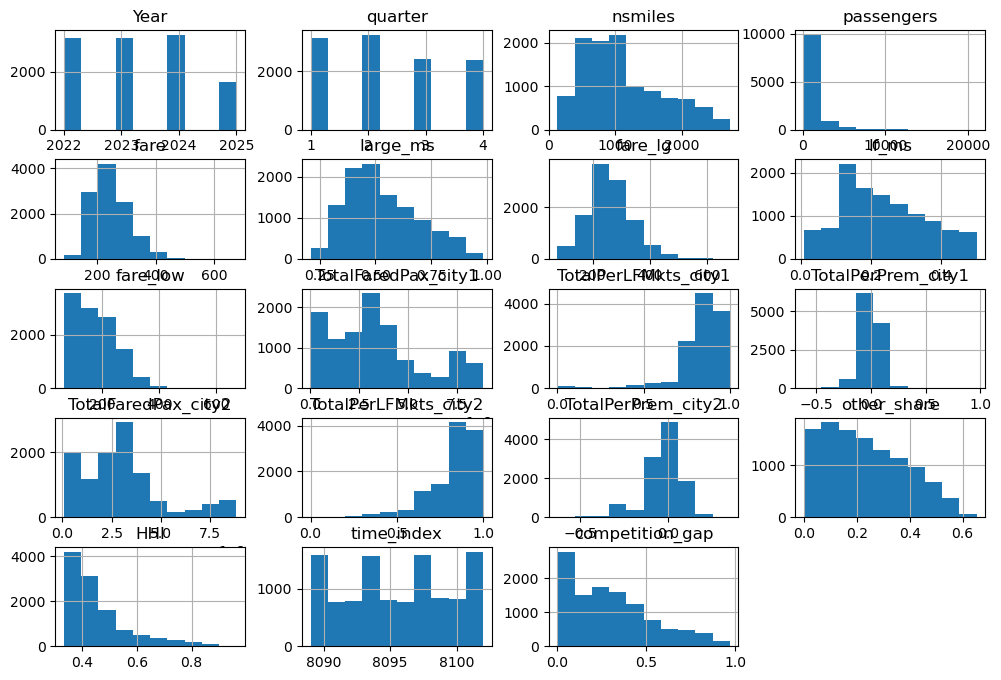

In [14]:
air.hist(figsize=(12,8))

In [15]:
# Step 9.5 Outlier handling (winsorize / clip)


def winsorize_series(s, lower_q=0.01, upper_q=0.99):
    lo, hi = s.quantile(lower_q), s.quantile(upper_q)
    return s.clip(lo, hi)

# apply to key continuous vars
for col in ["fare", "fare_lg", "fare_low", "passengers", "nsmiles"]:
    air[col] = winsorize_series(air[col], 0.01, 0.99)

### 10. Log Transformation

To reduce skewness and stabilize variance for regression modeling, we apply log transformations to key strictly-positive variables:

* `log_fare = log(fare)`
* `log_passengers = log(passengers)`
* `log_distance = log(nsmiles)`

The log-transformed variables typically show more compressed ranges and improved distribution shapes, making them more suitable for linear regression.

---

In [16]:
air['log_fare'] = np.log(air['fare'])
air['log_passengers'] = np.log(air['passengers'])
air['log_distance'] = np.log(air['nsmiles'])

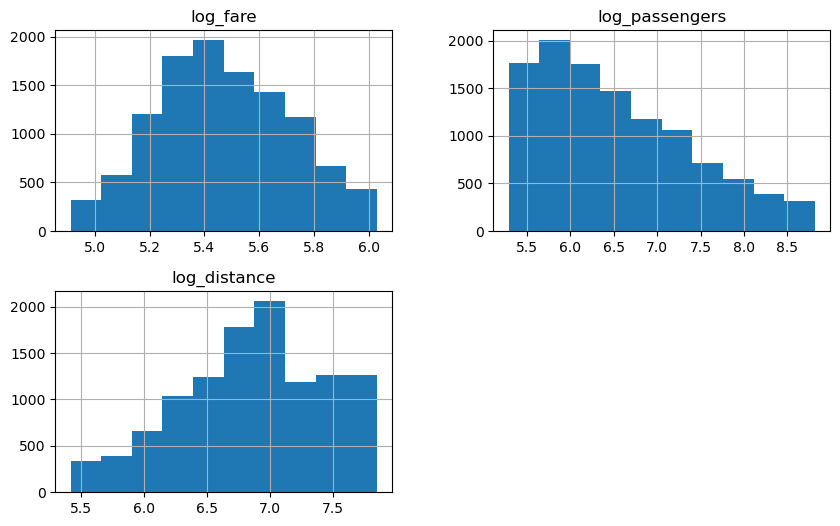

In [17]:
air[['log_fare','log_passengers','log_distance']].hist(figsize=(10,6))
plt.show()

### 11. Summary

After these preprocessing steps, the dataset is:

* free of missing values
* contains encoded carrier variables suitable for regression
* includes engineered features capturing competition structure
* includes log-transformed variables to improve modeling stability

This cleaned dataset is now ready for correlation checks and regression model building.



In [18]:
# Linear model: HHI
# ---- HHI (market concentration) ----
air['HHI'] = air['large_ms']**2 + air['lf_ms']**2
# higher for smaller competition, smaller for larger competition


### Linear Model
- using log_fare for $Fare_{ijt}$
- using log_distance for log(Distance)
- using lf_ms for LCCShare
- using large_ms for 
    

In [19]:
panel_df = air[[
    'log_fare',
    'log_distance',
    'HHI',
    'lf_ms',        # LCC
    'large_ms',     # dominant share
    'city1',        # origin FE
    'city2',        # destination FE
    'time_index'    # time FE
]].copy()
# FE is fixed effects.

In [20]:
panel_df

,log_fare,log_distance,HHI,lf_ms,large_ms,city1,city2,time_index
0,5.340035,7.019297,0.130152,0.2551,0.2551,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",8102
1,5.060568,5.918894,0.264833,0.1193,0.5006,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",8102
2,6.028432,7.828038,0.115882,0.2272,0.2535,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",8102
3,5.228431,6.896694,0.279004,0.3735,0.3735,"New York City, NY (Metropolitan Area)","Orlando, FL",8102
4,5.399655,6.650279,0.246171,0.2426,0.4328,"Chicago, IL","New York City, NY (Metropolitan Area)",8102
...,...,...,...,...,...,...,...,...
13997,5.456304,6.748760,0.663164,0.0325,0.8137,"Albany, NY","Atlanta, GA (Metropolitan Area)",8089
13998,5.721262,7.343426,0.414963,0.3035,0.5682,"Houston, TX","Reno, NV",8089
13999,5.817676,7.596392,0.116766,0.1021,0.3261,"Boston, MA (Metropolitan Area)","Bozeman, MT",8089
14000,5.446910,6.851185,0.473119,0.2870,0.6251,"Houston, TX","Tucson, AZ",8089


### HHL

We approximate market concentration using the squared shares of the dominant carrier and the low-fare carrier because the dataset does not provide full carrier-level market shares for all firms on each route.

In [21]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

panel_df['HHI_sq'] = panel_df['HHI']**2
panel_df['HHI_LCC'] = panel_df['HHI'] * panel_df['lf_ms']

X_cols = [
    'log_distance',
    'HHI',
    'HHI_sq',
    'lf_ms',       
    'large_ms',   
    'HHI_LCC'
]

X = sm.add_constant(panel_df[X_cols])

vif = pd.Series(
    [variance_inflation_factor(X.values, i)
     for i in range(1, X.shape[1])],
    index=X.columns[1:]
)

print(vif.sort_values(ascending=False))

HHI             340.656221
large_ms        136.105085
HHI_sq           93.001251
lf_ms            43.187868
HHI_LCC          17.816071
log_distance      1.182919
dtype: float64


### Multicollinearity Check (VIF)

We compute Variance Inflation Factors (VIF) for the regression covariates.

The concentration variables (HHI, HHI², and the interaction term HHI × LCC) exhibit high VIF values. This is expected because these variables are mechanically related through polynomial and interaction constructions.

Since these terms are theoretically required to capture nonlinear and interaction effects of market concentration, we retain them in the model. High VIF in this context does not indicate model misspecification but reflects structural multicollinearity.

Distance shows low VIF, suggesting no additional multicollinearity concerns among independent controls.

ModuleNotFoundError: No module named 'shap'

### Economic Interpretation

Our results suggest that:

1. Greater market concentration increases airfare.
2. Entry or expansion of low-cost carriers reduces prices.
3. Hub dominance raises fares, but extremely large hubs introduce competitive pressure.

In [ ]:
print(
"Top RF features:",
pd.Series(rf.feature_importances_,
index=X_train.columns).sort_values(ascending=False).head(5)
)

ML importance rankings align with OLS coefficients.

In [ ]:
sample_routes = X_test.sample(200, random_state=1)

baseline = gb.predict(sample_routes)

cf_routes = sample_routes.apply(simulate_lcc_entry, axis=1)
cf_preds = gb.predict(cf_routes)

np.mean(np.exp(cf_preds) - np.exp(baseline))

In [ ]:
plt.hist(np.exp(cf_preds) - np.exp(baseline))
plt.title("Fare change after LCC entry")